

# Project: Investigate TMDB movies dataset 
### by:Mohamed Flaifel

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project i will investigate a dataset from TMDB database. i will try to analyze it in a story-telling way and try to figure out some obvious questions about the success of a movie.
we will look through the years about how the profit and budget have changed also to see if a specific genre is more prefred than other. we will get to know the most profitable director, actor/actress and production companies. they're all interesting facts to know, arent they?

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.  
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.  
Variables:  
> - id  
> - imdb_id  
> - popularity  
> - budget
> - revenue
> - original_title
> - cast
> - homepage
> - director
> - tagline
> - keywords
> - overview
> - runtime
> - genres
> - production_companies
> - release_date
> - vote_count
> - vote_average
> - release_year
> - budget_adj
> - revenue_adj

# questions to be addressed in this report are:
> 1) What are the trends of Budget, Revenue and Profit over time?  
2) is there a corellation between budget and vote/popularity?  
3) What are the top 3 genres that profit the most?  
4) What are the most genres produced?  
5) is there a specific genre that are costly than other?  
6) what is the popularity and avg. voting for the top 10 actor, director and production companies?


<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, i will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

In [1]:
# import all libraries we may need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)
import datetime
%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
# load the fie into a dataframe (df)
df=pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
# there are some unwanted columns that wont help much in the analysis. we will get rid of them
unwanted = ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview',  'budget_adj', 'revenue_adj']
df.drop(unwanted, inplace=True, axis=1)

In [4]:
#checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


>in the previous cell we find that there are some null values in (cast, director, genres and production companies).  
as those columns doesnt have influence on our data, i will just fill them with 'Unknown'

In [5]:
df=df.fillna('Unknown')

In [6]:
# check again for null values
df.isnull().sum().sum()


0

In [7]:
#check for duplicates and deleteing them
df.duplicated().sum()
df=df.drop_duplicates()

In [8]:
#check again for duplicates
df.duplicated().sum()

0

In [9]:
df.head()

popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   
3      136   Action|Adventure|Science Fiction|Fantasy   
4      137                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year  
0           6.5          2015  
1           7.1          2015  
2           6.3          2015  
3           7.5          2015  
4           7.3          2015

# Reshaping columns:
> for better visualisazion, i will only take the first actor/actresss in the ***cast*** field assuming they are the Headliner. also doing the same in the ***production companies and genres.***  
and finally i will add another column  of the ***Profit***, which obviously will be revenue - budget

In [10]:
# spliting each column and taking the first entry
df.production_companies=df.production_companies.apply(lambda x: x.split('|')[0])
df.cast=df.cast.apply(lambda x: x.split('|')[0])
df.genres=df.genres.apply(lambda x: x.split('|')[0])

In [11]:
df['profit']= df.revenue - df.budget

In [12]:
#showing some statistics
df.describe()

popularity        budget       revenue       runtime    vote_count  \
count  10865.000000  1.086500e+04  1.086500e+04  10865.000000  10865.000000   
mean       0.646446  1.462429e+07  3.982690e+07    102.071790    217.399632   
std        1.000231  3.091428e+07  1.170083e+08     31.382701    575.644627   
min        0.000065  0.000000e+00  0.000000e+00      0.000000     10.000000   
25%        0.207575  0.000000e+00  0.000000e+00     90.000000     17.000000   
50%        0.383831  0.000000e+00  0.000000e+00     99.000000     38.000000   
75%        0.713857  1.500000e+07  2.400000e+07    111.000000    146.000000   
max       32.985763  4.250000e+08  2.781506e+09    900.000000   9767.000000   

       vote_average  release_year        profit  
count  10865.000000  10865.000000  1.086500e+04  
mean       5.975012   2001.321859  2.520261e+07  
std        0.935138     12.813260  9.659103e+07  
min        1.500000   1960.000000 -4.139124e+08  
25%        5.400000   1995.000000  0.000000e+00  
50%        6.000000   2006.000000  0.000000e+00  
75%        6.600000   2011.000000  9.092453e+06  
max        9.200000   2015.000000  2.544506e+09

# Zero Values!
>looks like some rows have zeros in budget and revenue, since those rows have influence over our analysis  
a good idea will be removing them

In [13]:
# removing any rows with zero values in budget and revenue
df=df.query('budget != 0 & revenue != 0')

# Some Quick Stats and Histograms:

In [14]:
df.describe()

popularity        budget       revenue      runtime   vote_count  \
count  3854.000000  3.854000e+03  3.854000e+03  3854.000000  3854.000000   
mean      1.191554  3.720370e+07  1.076866e+08   109.220291   527.720291   
std       1.475162  4.220822e+07  1.765393e+08    19.922820   879.956821   
min       0.001117  1.000000e+00  2.000000e+00    15.000000    10.000000   
25%       0.462367  1.000000e+07  1.360003e+07    95.000000    71.000000   
50%       0.797511  2.400000e+07  4.480000e+07   106.000000   204.000000   
75%       1.368324  5.000000e+07  1.242125e+08   119.000000   580.000000   
max      32.985763  4.250000e+08  2.781506e+09   338.000000  9767.000000   

       vote_average  release_year        profit  
count   3854.000000   3854.000000  3.854000e+03  
mean       6.168163   2001.261028  7.048292e+07  
std        0.794920     11.282575  1.506195e+08  
min        2.200000   1960.000000 -4.139124e+08  
25%        5.700000   1995.000000 -1.321535e+06  
50%        6.200000   2004.000000  2.002019e+07  
75%        6.700000   2010.000000  8.170331e+07  
max        8.400000   2015.000000  2.544506e+09

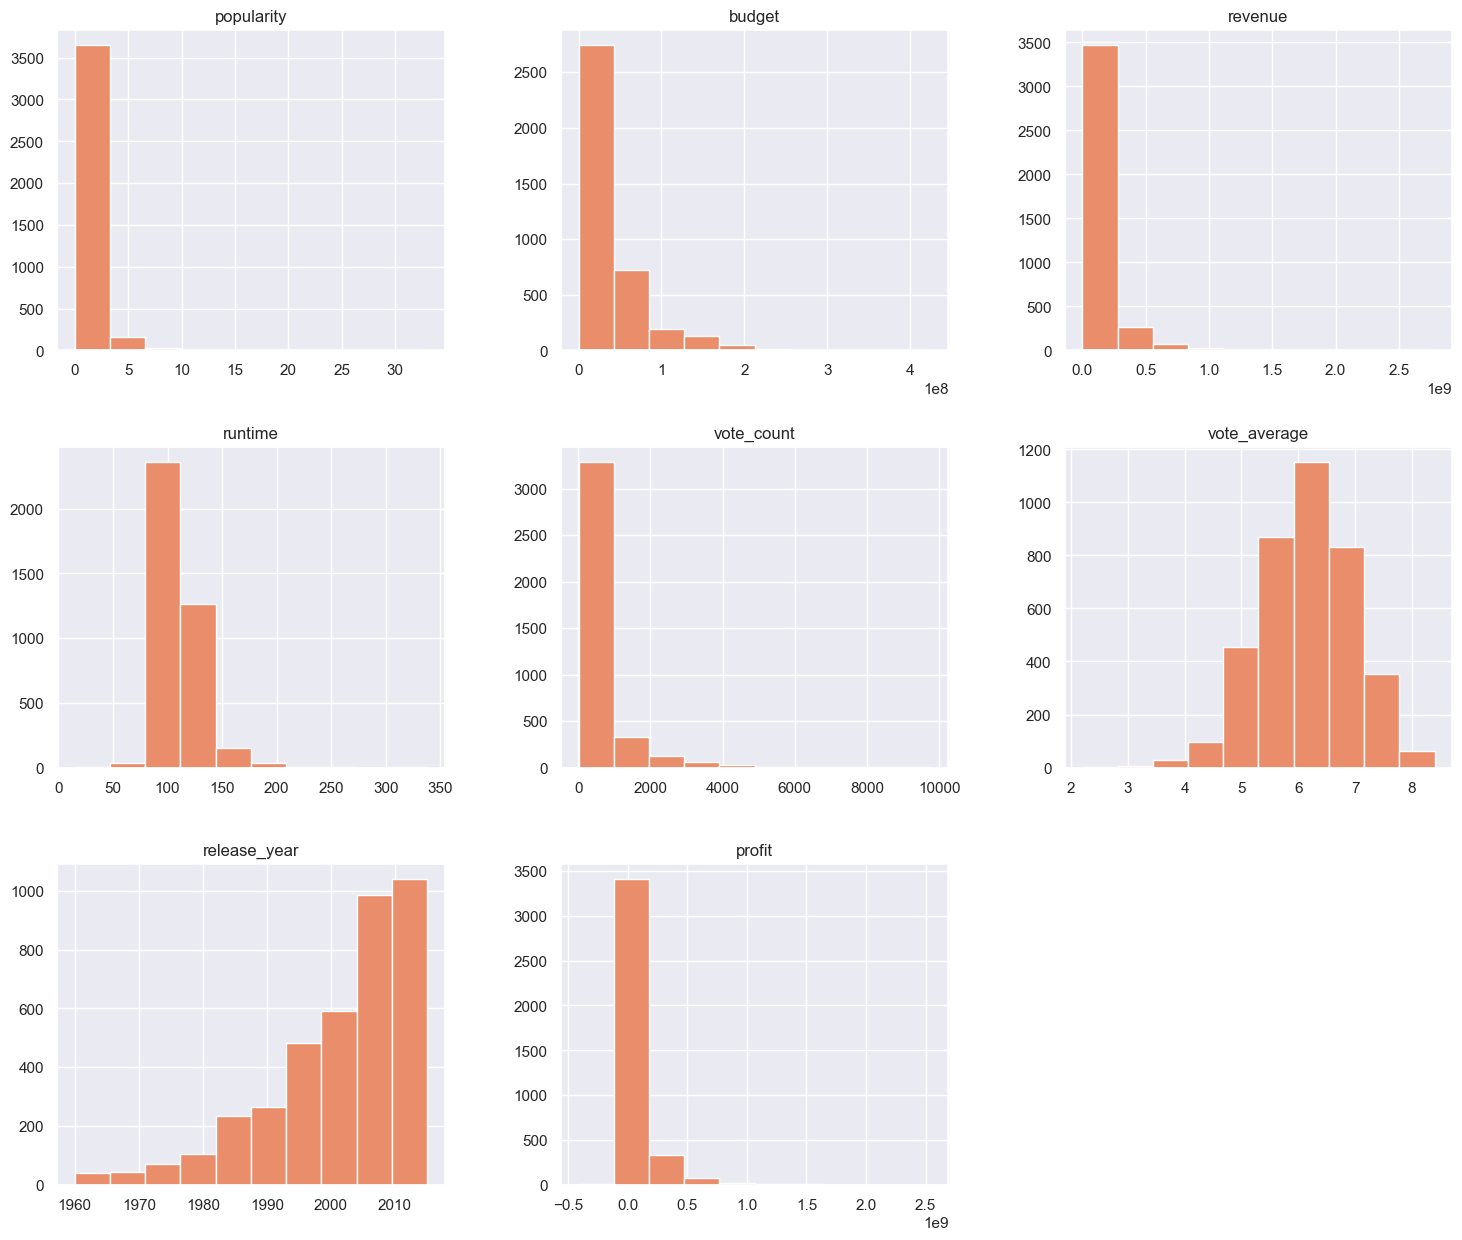

In [15]:
sns.set_theme(style='darkgrid', palette='flare')
df.hist(figsize=(18,15));


# some insights!
> from the above graphs we can quickly understand more about our data, for example, the avreage runtime of movies will be around 100 minutes, avreage votes are around 6 to 6.5. and most of our data is movies released from 2000 to 2015

<a id='eda'></a>
## Exploratory Data Analysis

> Now we move on to do some analysis and answer some questions.



## 1) What are the trends of Budget, Revenue and Profit over time?
> Do they go up or down?

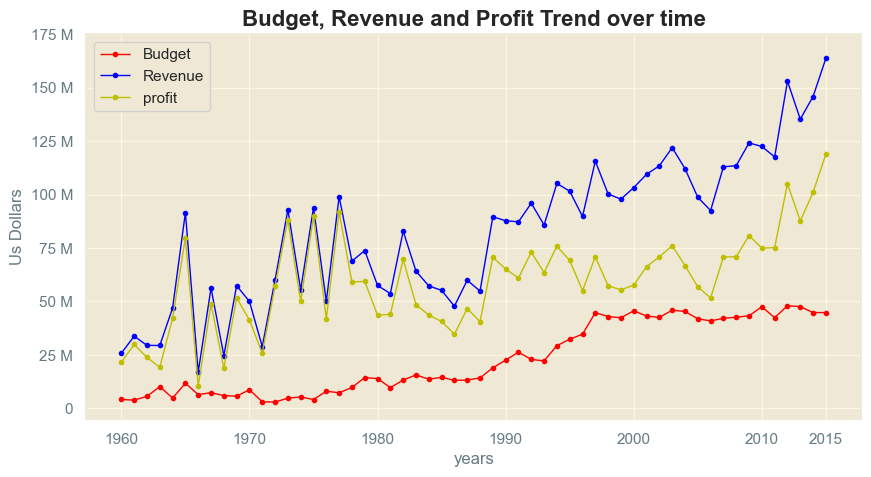

In [16]:
# grouping by year and filtering by budget, revenue, profit means
budgets=df.groupby('release_year')['budget'].mean()
revenue=df.groupby('release_year')['revenue'].mean()
profit=df.groupby('release_year')['profit'].mean()

# Ploting each variable as a line
plt.figure(figsize=(10,5))
plt.style.use('Solarize_Light2')
plt.plot(budgets, 'r.-', linewidth=1, label='Budget')
plt.plot(revenue, 'b.-', linewidth=1, label='Revenue')
plt.plot(profit, 'y.-', linewidth=1, label='profit')

# Setting Yticks and Xticks
yloc=[0,25000000, 50000000, 75000000, 100000000, 125000000, 150000000, 175000000]
myticks=['0', '25 M', '50 M', '75 M', '100 M', '125 M', '150 M', '175 M']
plt.yticks(yloc, myticks)
plt.xticks([1960, 1970, 1980, 1990, 2000, 2010, 2015])

# plotting annotations
plt.xlabel('years')
plt.ylabel('Us Dollars')
plt.title('Budget, Revenue and Profit Trend over time', fontdict={'fontweight': 'bold'})
plt.legend()
plt.show()

> - looking at the line graph we can see the in fact, Budgeet, Revenue and Profit are all rising over time

### 2) is there a corellation between budget and vote/popularity?

>for this question we will do a scatter plot with a trend line 
to see if there is a correlation between the variables


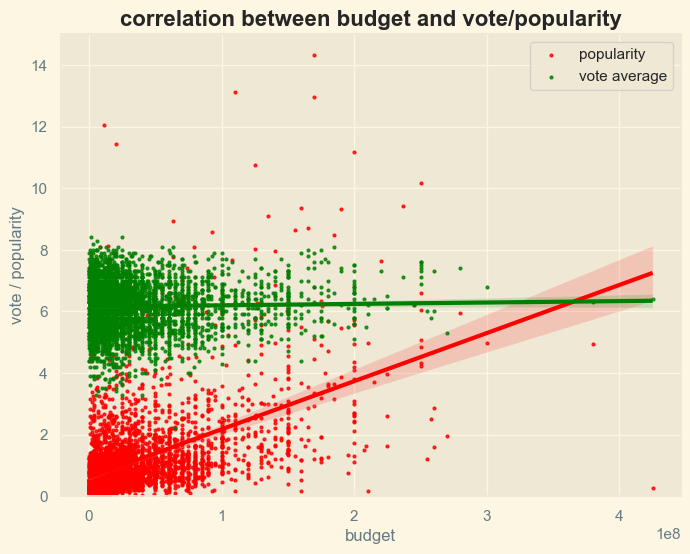

In [17]:
plt.figure(figsize=(8,6))
plt.style.use('Solarize_Light2')
sns.regplot(x=df.budget, y=df.popularity, color='r', label='popularity',  scatter_kws={'s':4})
sns.regplot(x=df.budget, y=df.vote_average, color='g', label='vote average', scatter_kws={'s':4})
plt.legend()
plt.ylim(0,15)
plt.ylabel('vote / popularity')
plt.title('correlation between budget and vote/popularity', fontdict={'fontweight': 'bold'})
plt.show()

> - looking at the trendline for the 2 scatterplots it looks like while Vote average doent have a correlation with the Budget,  
Popularity shows a really good correlation which means it is directly proportional with the Budget

### 3) What are the top 3 genres that profit the most?

> for this we need to group  data by genres and look at the avreage profit 

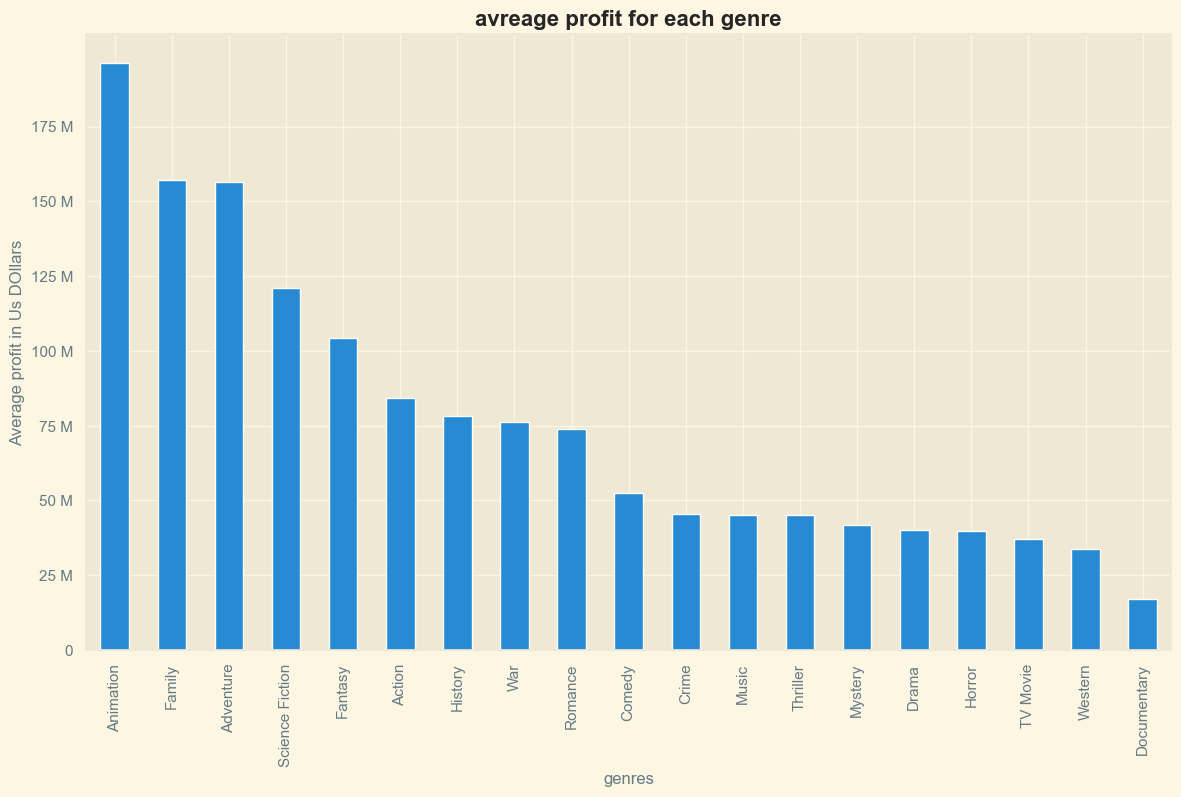

In [18]:
#grouping data with genres and finding mean profit:
genres=df.groupby('genres')['profit'].mean()
genres=genres.sort_values(ascending=False)

# Ploting a Bar Graph
genres.plot(kind='bar', figsize=(14,8));

#customizing the plot
yloc=[0,25000000, 50000000, 75000000, 100000000, 125000000, 150000000, 175000000]
myticks=['0', '25 M', '50 M', '75 M', '100 M', '125 M', '150 M', '175 M']
plt.yticks(yloc, myticks)
plt.ylabel('Average profit in Us DOllars')
plt.title('avreage profit for each genre', fontdict={'fontweight': 'bold'})
plt.style.use('Solarize_Light2')
plt.show()

> - we can see that on average *Animation, Family and Adventure* are the top 3 genres in terms of profit

### 4) What are the most genres produced?

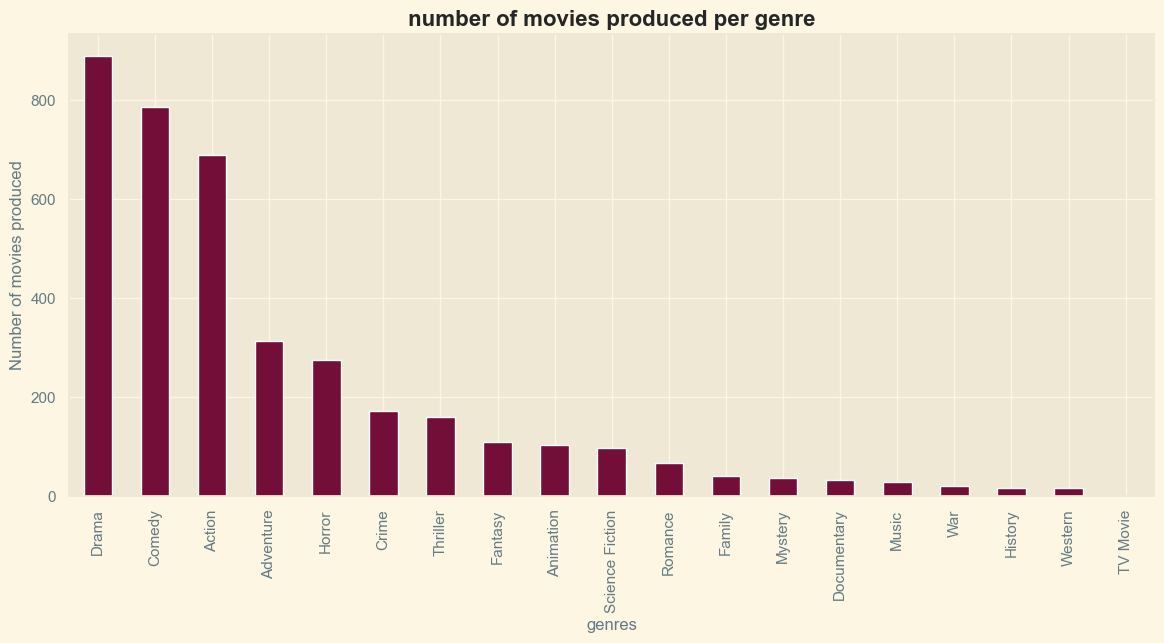

In [19]:
#grouping data with genres and finding counts and sorting them:
df_genres=df['genres']
counts= df_genres.value_counts(ascending=False)

# Ploting a bar graph
counts.plot(kind='bar', color='#730e38', figsize=(14,6));

#customizing the plot
plt.title('number of movies produced per genre', fontdict={'fontweight': 'bold'})
plt.ylabel('Number of movies produced')
plt.xlabel('genres')
plt.show()

> - *Drama* comes first in the list of top 3 genres produced with over 800 movies then *Comedy* comes second and *Action* is in 3rd place

# 5) is there a specific genre that are costly than other?

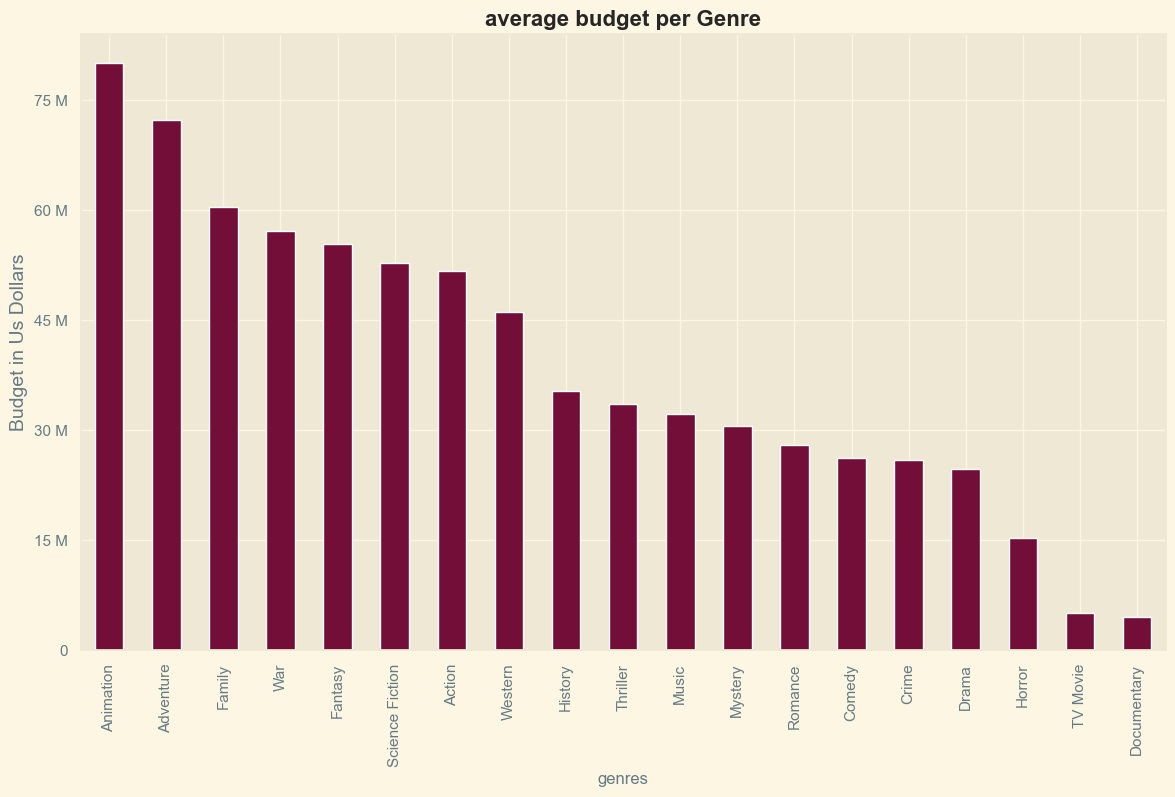

In [20]:
cost=df.groupby('genres')['budget'].mean()
cost=cost.sort_values(ascending=False)
cost.plot(kind='bar', figsize=(14,8), color='#730e38')
yloc=[0,15000000, 30000000, 45000000, 60000000, 75000000]
myticks=['0', '15 M', '30 M', '45 M', '60 M', '75 M']
plt.ylabel('Budget in Us Dollars', fontdict={'fontsize': 14})
plt.title('average budget per Genre', fontdict={'fontweight': 'bold'})
plt.yticks(yloc, myticks)
plt.show()
plt.style.use('Solarize_Light2')



>Top 3 genres that are costly to produce are:  
>- Animation 
>- Adventure
>- Family.

this makes sense also because Animation is the number 1 profitable genre

> Now let's take a close look at the top 10 most profitable movies, we might answer questions like
# 6) what is the popularity and avg. voting for the top 10 actor, director and production companies? 

In [21]:
# filtering data to get only the top 10
df_subset=df[['cast','vote_average', 'popularity','profit', 'director', 'production_companies']]
df_subset=df_subset.sort_values(by='popularity',ascending=False)[:10]

# defining a function that takes a column name and plot a bar graph 
# based on the popularity and avreage rating
def get_bar(column):
    data= df_subset[[column, 'vote_average', 'popularity']]
    data=data.set_index(column)
    data.plot(kind='bar')
    plt.title('Vote Avreage and Popularity for every {}'.format(column), fontdict={'fontsize': 12})

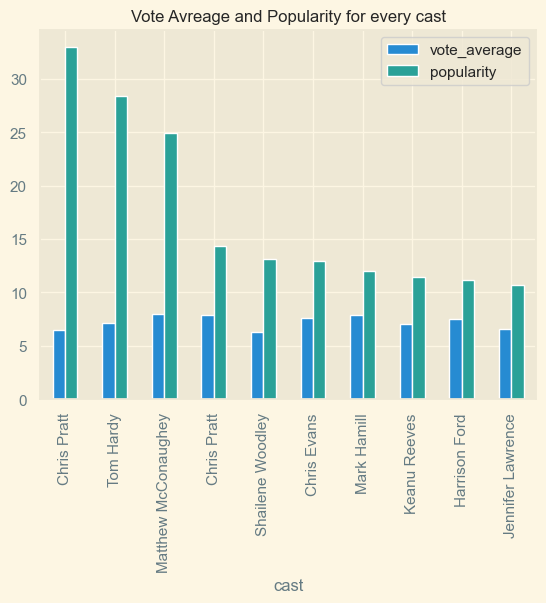

In [22]:
get_bar('cast')

> - Chris Pratt, Tom Hardy and Mathew McConaughey are the top 3  popular actors

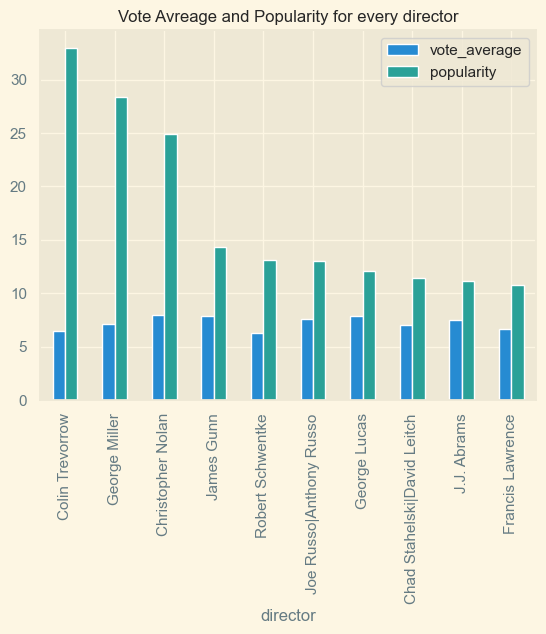

In [23]:
get_bar('director')

> - Colin Trevorrow, George Miller and the MIGHTY Christopher Nolan are top 3 Directors

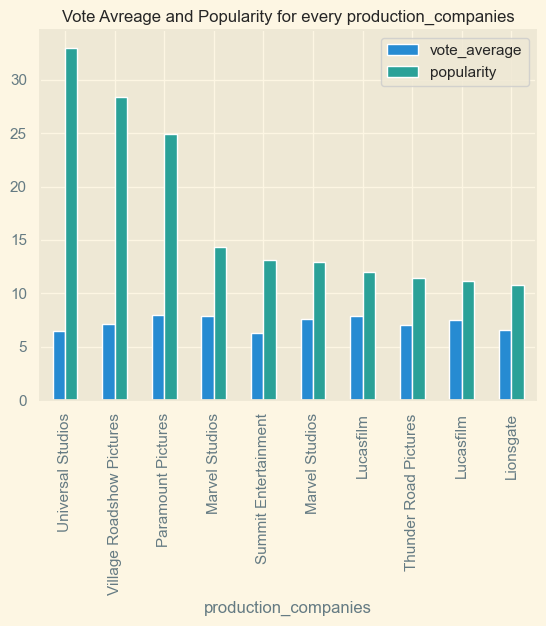

In [24]:
get_bar('production_companies')

> - Universal Studios, Village Roadshow and Paramount are the top 3 production companies

<a id='conclusions'></a>
# Conclusions

> ### 1) What are the trends of Budget, Revenue and Profit over time?
we could see from the line graph that all three variables rises over Time

> ### 2) is there a corellation between budget and vote/popularity?
after plotting a scatter plot we can easily see that there is no correlation between budget and vote
but there might be a good correlation between budget and popularity

>  ### 3) What are the top 3 genres that profit the most?  
we found that the top 3 genres that profit the most were:  
1- animation  
2- Family  
3- adventure

> ### 4) What are the most genres produced?
we can see that Drama, Comedy and action are the top 3 genres produced over time

> ### 5) is there a specific genre that are costly than other?
we can see that Animation, Adventure and Family are the top 3 genres costly (budget wise)

> ### 6) what is the popularity and avg. voting for the top 10 actor, director and production companies? 
we can see that the top 3 actors in our list are(Chris Pratt, Tom Hardy and Mathew McConaughey)
top 3 directors are(Colin Trevorrow, George Miller and the MIGHTY Christopher Nolan) and finally our top 3 companies are (Universal Studios, Village Roadshow and Paramount) im shocked Marvel is not in the top 3!  
we can also look at the popularity and voting for each in the report, it is clearly that there is a correlation between profit and popularity. but not voting

> ## Limitation:
this data is not so accurate as there are some fields that we are not sure of it yet, for example is the budgets and revenues all in dollars? also no specific critria for the genre. we also had some zero values that were needed to be deleted which left us with a small proportion of the data.


# Finally:
> i had so much fun investigation this dataset, ive tried so many things and learned much more.
i hope i meet the expactations and thank you in advance for your time>